In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Alcohol_Sales.csv', index_col='DATE', parse_dates=True)
data.index.freq = 'MS'

In [4]:
data

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
...,...
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174


<Axes: xlabel='DATE'>

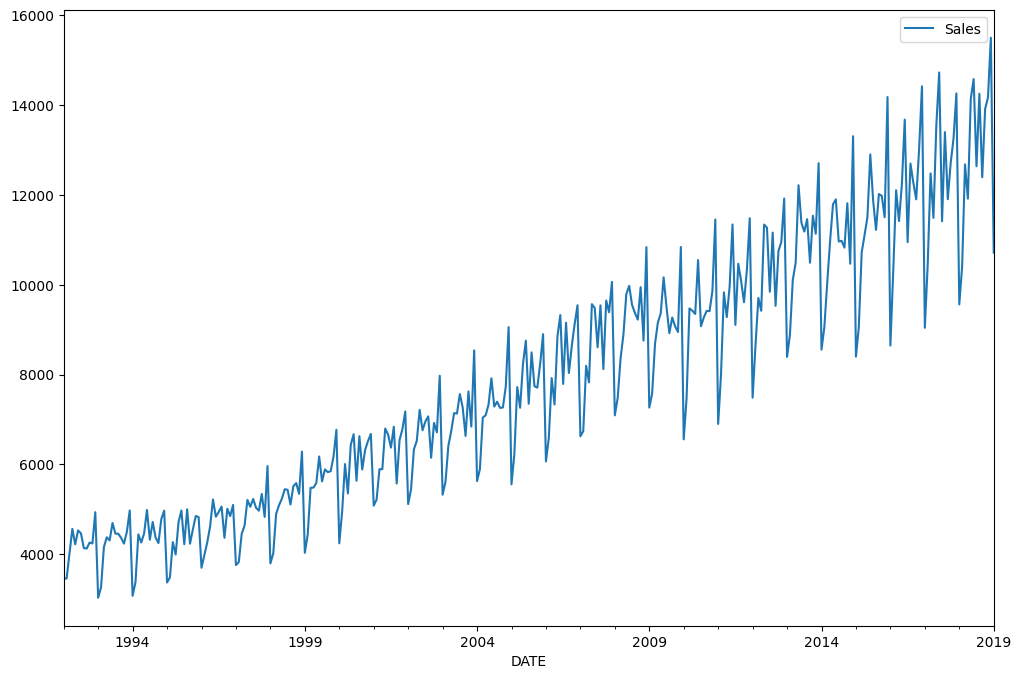

In [5]:
data.columns = ['Sales']
data.plot(figsize=(12,8))

In [6]:
data['Sale_LastMonth'] = data['Sales'].shift(+1)
data['Sale_2Monthsback'] = data['Sales'].shift(+2)
data['Sale_3Monthsback'] = data['Sales'].shift(+3)

data

,Sales,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
DATE,,,,
1992-01-01,3459,NaN,NaN,NaN
1992-02-01,3458,3459.0,NaN,NaN
1992-03-01,4002,3458.0,3459.0,NaN
1992-04-01,4564,4002.0,3458.0,3459.0
1992-05-01,4221,4564.0,4002.0,3458.0
...,...,...,...,...
2018-09-01,12396,14257.0,12640.0,14583.0
2018-10-01,13914,12396.0,14257.0,12640.0
2018-11-01,14174,13914.0,12396.0,14257.0


In [7]:
data = data.dropna()
data

,Sales,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
DATE,,,,
1992-04-01,4564,4002.0,3458.0,3459.0
1992-05-01,4221,4564.0,4002.0,3458.0
1992-06-01,4529,4221.0,4564.0,4002.0
1992-07-01,4466,4529.0,4221.0,4564.0
1992-08-01,4137,4466.0,4529.0,4221.0
...,...,...,...,...
2018-09-01,12396,14257.0,12640.0,14583.0
2018-10-01,13914,12396.0,14257.0,12640.0
2018-11-01,14174,13914.0,12396.0,14257.0


In [8]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [9]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=100, max_features=3, random_state=1)

In [10]:
import numpy as np
x1, x2, x3, y = data['Sale_LastMonth'], data['Sale_2Monthsback'], data['Sale_3Monthsback'], data['Sales']

x1, x2, x3, y = np.array(x1), np.array(x2),np.array(x3),np.array(y)
x1, x2, x3, y = x1.reshape(-1, 1), x2.reshape(-1, 1), x3.reshape(-1, 1), y.reshape(-1, 1)
X = np.concatenate((x1,x2,x3), axis=1)
X

array([[ 4002.,  3458.,  3459.],
       [ 4564.,  4002.,  3458.],
       [ 4221.,  4564.,  4002.],
       [ 4529.,  4221.,  4564.],
       [ 4466.,  4529.,  4221.],
       [ 4137.,  4466.,  4529.],
       [ 4126.,  4137.,  4466.],
       [ 4259.,  4126.,  4137.],
       [ 4240.,  4259.,  4126.],
       [ 4936.,  4240.,  4259.],
       [ 3031.,  4936.,  4240.],
       [ 3261.,  3031.,  4936.],
       [ 4160.,  3261.,  3031.],
       [ 4377.,  4160.,  3261.],
       [ 4307.,  4377.,  4160.],
       [ 4696.,  4307.,  4377.],
       [ 4458.,  4696.,  4307.],
       [ 4457.,  4458.,  4696.],
       [ 4364.,  4457.,  4458.],
       [ 4236.,  4364.,  4457.],
       [ 4500.,  4236.,  4364.],
       [ 4974.,  4500.,  4236.],
       [ 3075.,  4974.,  4500.],
       [ 3377.,  3075.,  4974.],
       [ 4443.,  3377.,  3075.],
       [ 4261.,  4443.,  3377.],
       [ 4460.,  4261.,  4443.],
       [ 4985.,  4460.,  4261.],
       [ 4324.,  4985.,  4460.],
       [ 4719.,  4324.,  4985.],
       [ 4

In [11]:
len(y)

322

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.03)

In [13]:
len(X_train)

312

In [14]:
model1.fit(X_train, Y_train)
model2.fit(X_train, Y_train)

C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_features=3, random_state=1)

In [15]:
pred_1 = model1.predict(X_test)
pred_2 = model2.predict(X_test)

In [16]:
pred_1

array([[ 4678.40628512],
       [ 4643.01174458],
       [ 4115.21521382],
       [10607.33090844],
       [11023.23283475],
       [ 5176.88173898],
       [ 5345.49222696],
       [ 5981.51023867],
       [ 6637.07422518],
       [ 7096.49495123]])

In [17]:
pred_2

array([ 4701.64,  4426.88,  4590.47, 10673.46,  9568.08,  4848.32,
        4860.87,  6568.46,  6534.38,  7071.71])

C:\Users\Malhar.Pandya\AppData\Local\Temp\ipykernel_7572\640019311.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


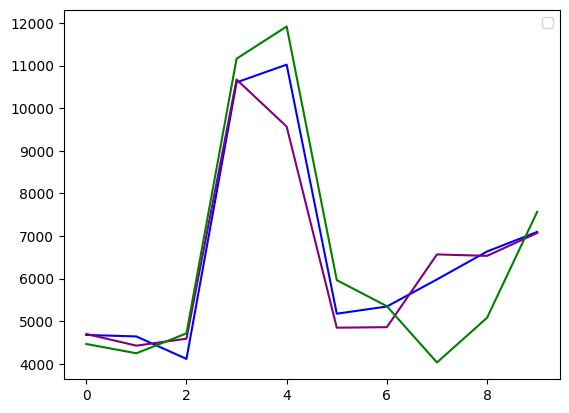

In [18]:
plt.plot(pred_1, color='blue')
plt.plot(pred_2, color='purple')
plt.plot(Y_test, color='green')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse1 = mean_squared_error(Y_test, pred_1)
mse2 = mean_squared_error(Y_test, pred_2)

rmse1 = sqrt(mse1)
rmse2 = sqrt(mse2)

print(rmse1, rmse2)
print(mse1, mse2)

934.5806139231638 1270.7483292257364
873440.9239209978 1614801.3162300002


In [24]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [26]:
model3 = GradientBoostingRegressor(n_estimators=100, random_state=42)
model4 = XGBRegressor(n_estimators=100, random_state=42, learning_rate=0.1)

In [27]:
model3.fit(X_train, Y_train)
model4.fit(X_train, Y_train)

C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Malhar.Pandya\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [28]:
pred3 = model3.predict(X_test)
pred4 = model4.predict(X_test)

In [29]:
mse3 = mean_squared_error(Y_test, pred3)
mse4 = mean_squared_error(Y_test, pred4)

rmse3 = sqrt(mse3)
rmse4 = sqrt(mse4)

print(rmse3, rmse4)
print(mse4, mse4)

1111.6482728833917 1393.5352076643057
1941940.375 1941940.375


C:\Users\Malhar.Pandya\AppData\Local\Temp\ipykernel_7572\1488926055.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


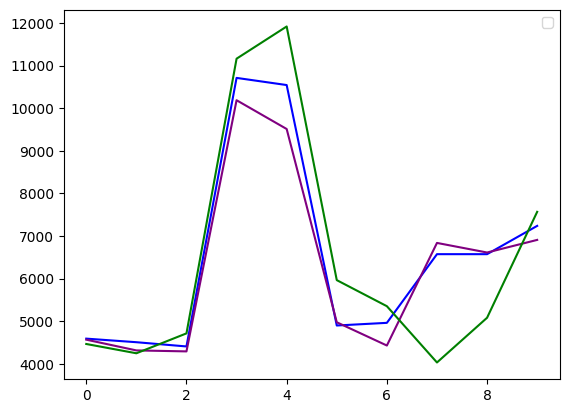

In [30]:
plt.plot(pred3, color='blue')
plt.plot(pred4, color='purple')
plt.plot(Y_test, color='green')
plt.legend()
plt.show()